## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
study_results.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Combine the data into a single dataset

merged_data_df=pd.merge(mouse_metadata, study_results, how= 'outer', on="Mouse ID")


In [4]:
# Display the data table for preview
merged_data_df.head(100)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
95,u364,Capomulin,Male,18,17,0,45.000000,0
96,u364,Capomulin,Male,18,17,5,45.760886,1
97,u364,Capomulin,Male,18,17,10,46.568417,2
98,u364,Capomulin,Male,18,17,15,47.212200,2


In [5]:
# Checking the number unique Mouse IDs

len(np.unique(merged_data_df["Mouse ID"]))


249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = merged_data_df[merged_data_df.duplicated(['Mouse ID', 'Timepoint'])]

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_data_df.drop( merged_data_df[merged_data_df['Mouse ID']== 'g989'].index, inplace=True)

In [9]:
#the number of rows decreased by 13 due to duplicates (1893 to 1880 rows)
merged_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Checking the number of mice in the clean DataFrame.
len(merged_data_df)

1880

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

merged_data_regimen_df=merged_data_df.groupby('Drug Regimen')
merged_data_regimen_df.count().head(20)

In [13]:


# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_vol= merged_data_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median_tumor_vol= merged_data_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
var_tumor_vol=merged_data_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
std_tumor_vol=merged_data_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
SEM_tumor_vol= merged_data_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']


# Assemble the resulting series into a single summary dataframe.

summary_df = pd.DataFrame({"Mean": mean_tumor_vol, "Median": median_tumor_vol, "Variance": var_tumor_vol, "Standard Deviation": std_tumor_vol, "SEM": SEM_tumor_vol})


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# Using the aggregation method, produce the same summary statistics in a single line
merged_data_regimen_df.agg(Mean=('Tumor Volume (mm3)', np.mean), \
                           Median=('Tumor Volume (mm3)', np.median ), \
                           Variance = ('Tumor Volume (mm3)', np.var ), \
                           Standard_Deviation = ('Tumor Volume (mm3)', np.std),\
                           SEM = ('Tumor Volume (mm3)', st.sem)) 

,Mean,Median,Variance,Standard_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [16]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

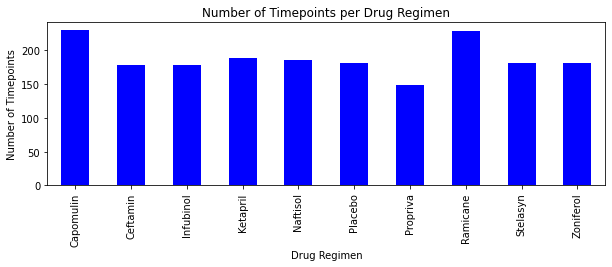

In [33]:
plot_data = pd.DataFrame(merged_data_df.groupby(["Drug Regimen"]).count()).reset_index()
new_df = plot_data[["Drug Regimen", "Timepoint"]]
new_df = new_df.set_index("Drug Regimen") 

new_df.plot(kind="bar",color='b',alpha=1.0, figsize=(10,3), legend=False)

plt.title("Number of Timepoints per Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.show()

In [18]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

In [19]:
Regimen_list = summary_df.index.tolist()
Regimen_list

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [20]:
Timepoints = (merged_data_df.groupby(["Drug Regimen"])["Timepoint"].count()).tolist()
Timepoints

[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

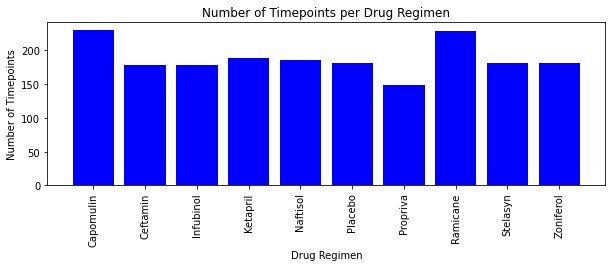

In [32]:

plt.figure(figsize=(10,3))
plt.bar(Regimen_list, Timepoints, color='b', alpha=1.0, align="center", )


plt.title("Number of Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.xticks(rotation=90)
plt.show()

## Pie Plots

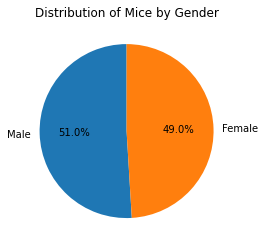

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = merged_data_df['Sex'].value_counts()
gender_data

pie = gender_data.plot.pie(autopct="%1.1f%%", startangle=90, title = 'Distribution of Mice by Gender')
pie.set_ylabel('')
plt.show()

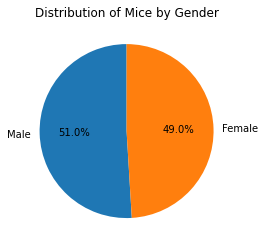

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_data, labels=data.index.values, autopct="%1.1f%%", startangle=90)
plt.title('Distribution of Mice by Gender')

# Display resulting plot
plt.show()

## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Max_timepoint_df = pd.DataFrame(merged_data_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'Max_timepoint'})

In [25]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
updated_merged_df = pd.merge(merged_data_df, Max_timepoint_df, on='Mouse ID')
updated_merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [51]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list=['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data= []

#for loop
for drug in drug_list:
    
    #create df of mice where each Drug was used
    store_df = updated_merged_df.loc[updated_merged_df['Drug Regimen'] == drug]

    #use newly created df and start another that match where Timepoint is greatest(last timepoint)
    final_volume_df = store_df.loc[store_df['Timepoint'] == store_df['Max_timepoint']]
    
    #now create df that has data for Tumor volume at the relevant timepoint (last)
    all_volumes = final_volume_df['Tumor Volume (mm3)']
    
    #contains a list of volumes for each drug regiment where the the timepoint was greatest(last timepoint)
    tumor_vol_data.append(all_volumes)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = all_volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'The interquartile range for {drug} is {iqr}')

    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    
    
    outliers_count = (all_volumes.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Possible number of {drug} outliers: {outliers_count} \n')
    
    

The interquartile range for Capomulin is 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Possible number of Capomulin outliers: 0 

The interquartile range for Ramicane is 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Possible number of Ramicane outliers: 0 

The interquartile range for Infubinol is 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Possible number of Infubinol outliers: 1 

The interquartile range for Ceftamin is 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Possible number of Ceftamin outliers: 0 



## Box plot

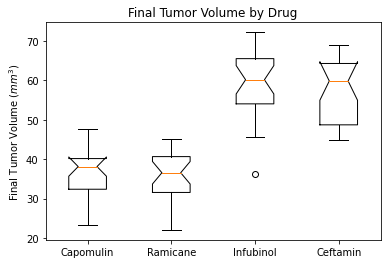

In [56]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
    
plot_properties = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black', notch=None)
plt.boxplot(tumor_vol_data, plot_properties)

# Add title and labels to boxplot
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume ($mm^3$)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

#not sure why notched box plots appear, tried notch=none and false with same result


## Line and Scatter Plots

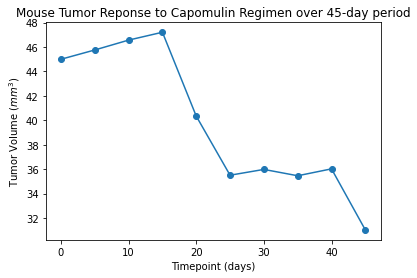

In [28]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
select_mouse = merged_data_df.loc[merged_data_df['Mouse ID'] == 'u364']
plt.plot(select_mouse['Timepoint'], select_mouse['Tumor Volume (mm3)'],marker = 'o')

plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume ($mm^3$)")
plt.title("Mouse Tumor Reponse to Capomulin Regimen over 45-day period")
plt.show()

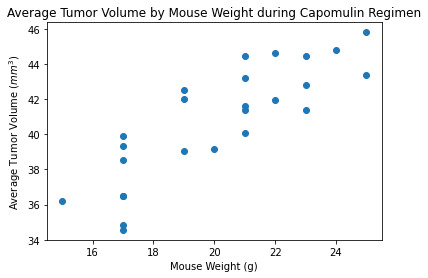

In [29]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#data frame with Capomulin only treaments
cap_df = merged_data_df.loc[merged_data_df['Drug Regimen'] == 'Capomulin']

#find average tumor volume
avg_vol_df = pd.DataFrame(cap_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})


#merging the two dataframes
weight_tumor_vol_df = pd.merge(cap_df, avg_vol_df, on='Mouse ID')
cap_plot_df = weight_tumor_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
cap_plot_df

x_values= cap_plot_df['Weight (g)']
y_values = cap_plot_df['avg_tumor_vol']

plt.scatter(x_values,y_values)



plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume ($mm^3$)")
plt.title('Average Tumor Volume by Mouse Weight during Capomulin Regimen')
# Display plot
plt.show()

## Correlation and Regression

The r-squared value is: 0.7088568047708721


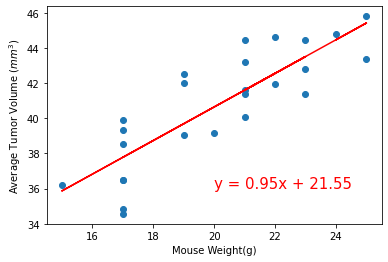

In [30]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Mouse Weight(g)')
plt.ylabel('Average Tumor Volume ($mm^3$)')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

### The r-value of 0.70 indicates a strong positive linear relationship